In [ ]:
import pandas as pd
import numpy as np

Gerar rotas para um agente em um ambiente de gridworld de 8x8 em Python com pontos de início e chegada, bem como células de montanha, onde o agente não pode entrar, e células de areia movediça que capturam o agente e encerram o jogo.

Barema:
- Implementaçao do grid: execução (peso 1)
- Função para visualização do grid (peso 1)
- Função com o conjunto de ações que o agente pode realizar (peso 2)
- Função com as recompensas (peso 2)
- Função com a Lógica do Agente: (peso 2)
- Implemnetar as condições de parada (peso 1)
- clareza do código (peso 1)

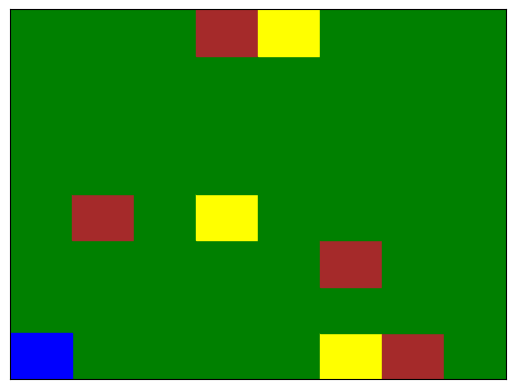

Posição do agente: (0, 0)


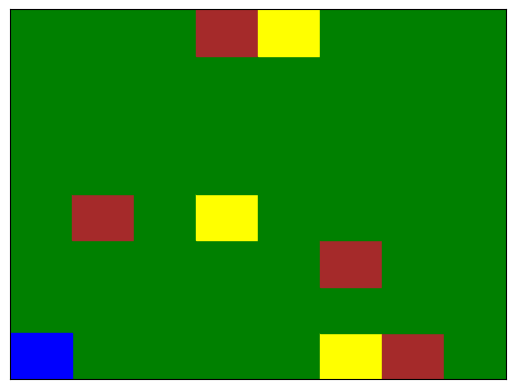

Posição do agente: (0, 0)


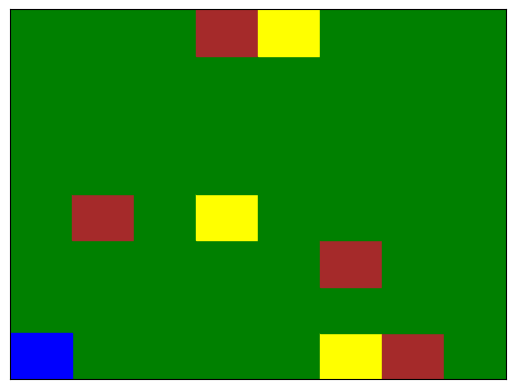

Posição do agente: (0, 0)


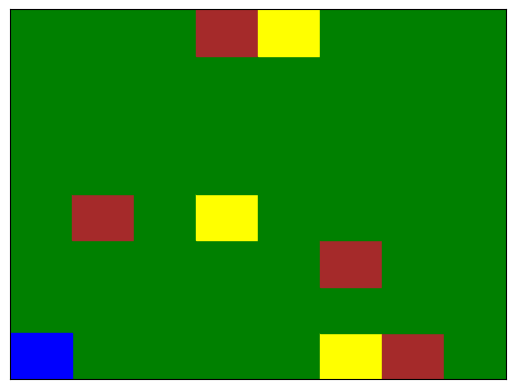

Posição do agente: (0, 0)


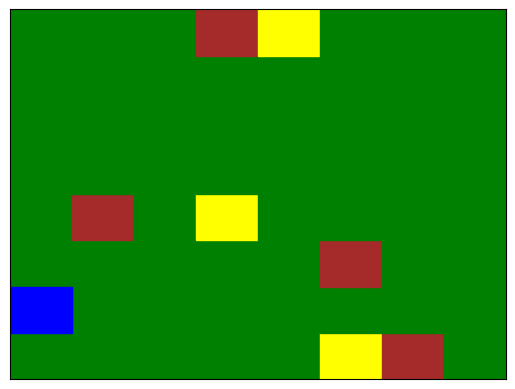

Posição do agente: (0, 1)


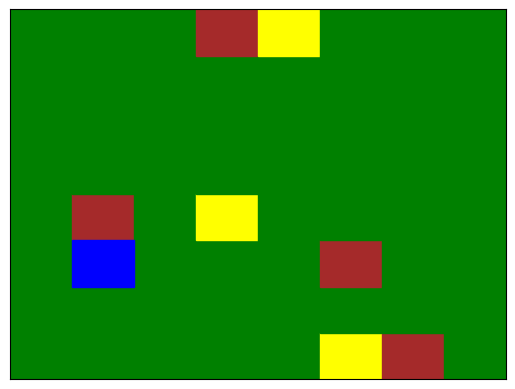

Posição do agente: (1, 2)


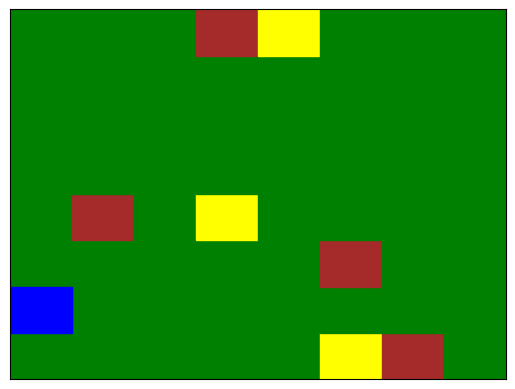

Posição do agente: (0, 1)


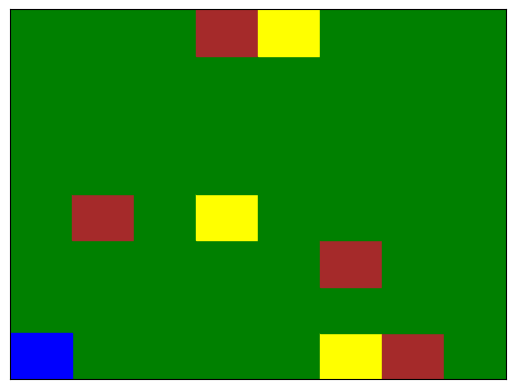

Posição do agente: (0, 0)


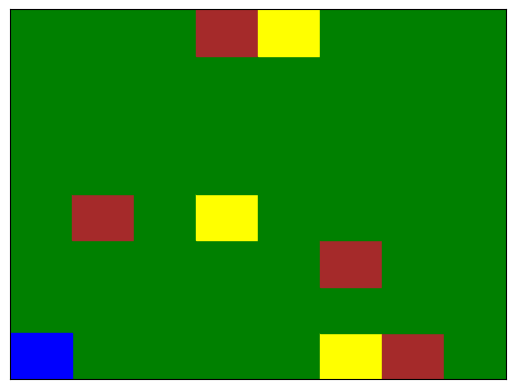

Posição do agente: (0, 0)


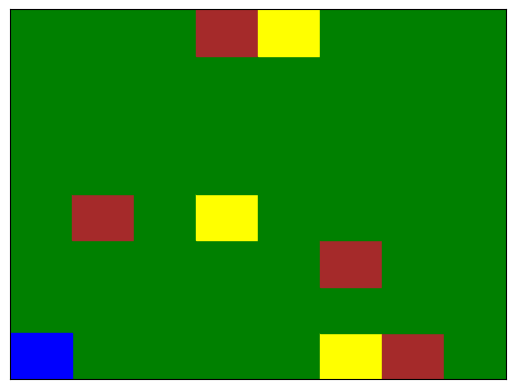

Posição do agente: (0, 0)


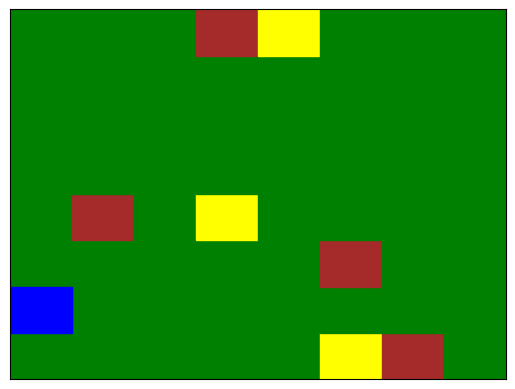

Posição do agente: (0, 1)


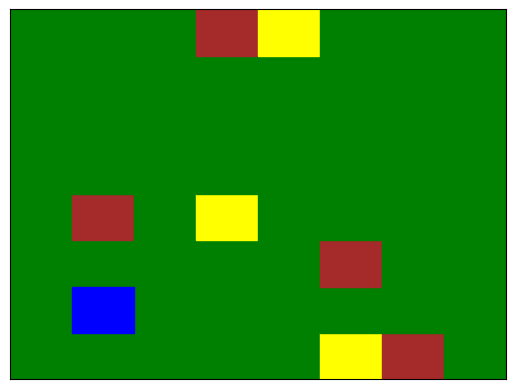

Posição do agente: (1, 1)


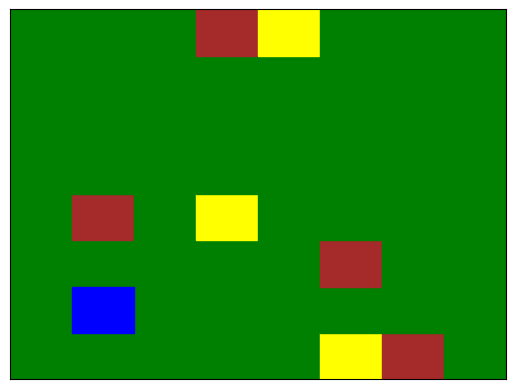

Posição do agente: (1, 1)


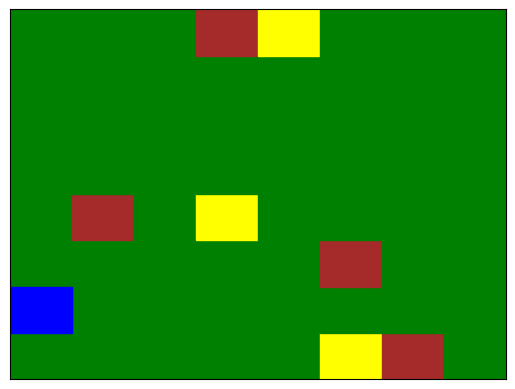

Posição do agente: (0, 1)


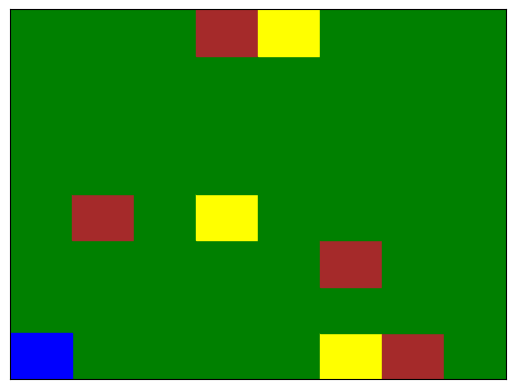

Posição do agente: (0, 0)


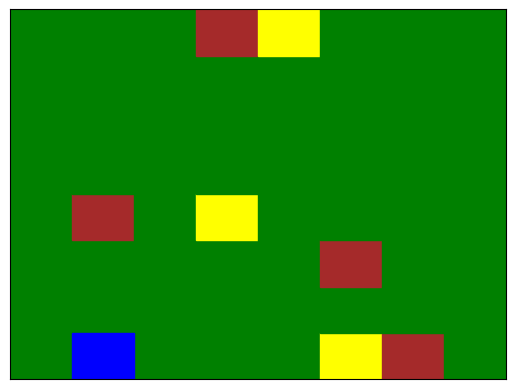

Posição do agente: (1, 0)


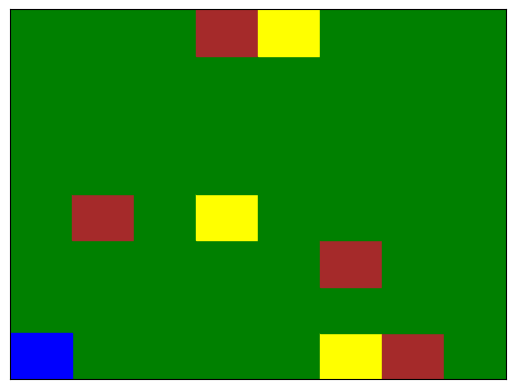

Posição do agente: (0, 0)


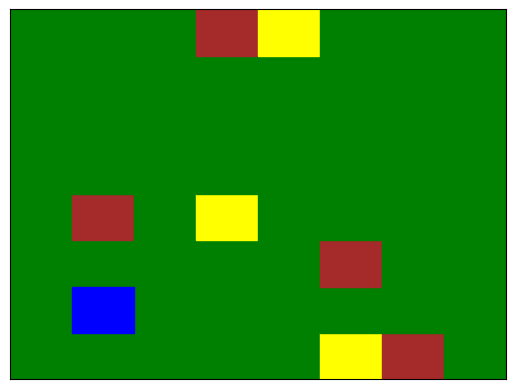

Posição do agente: (1, 1)


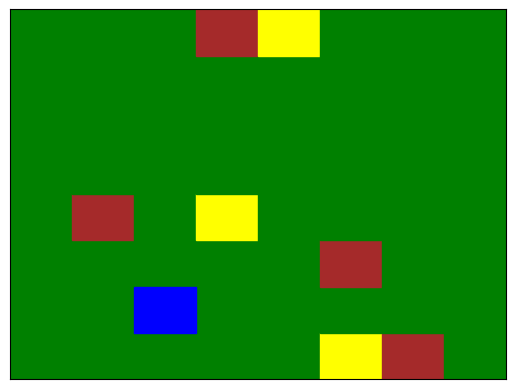

Posição do agente: (2, 1)


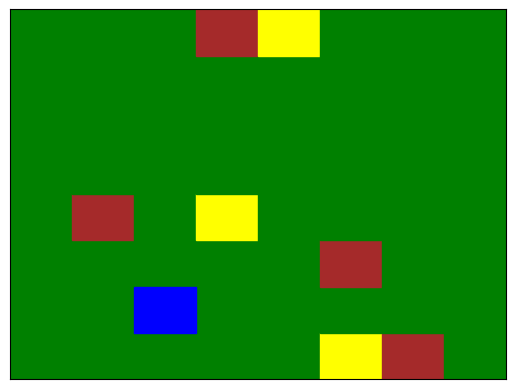

Posição do agente: (2, 1)


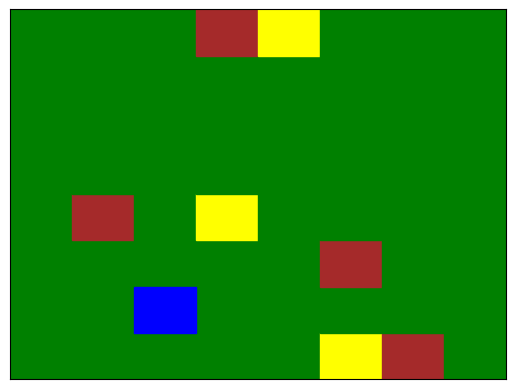

Posição do agente: (2, 1)


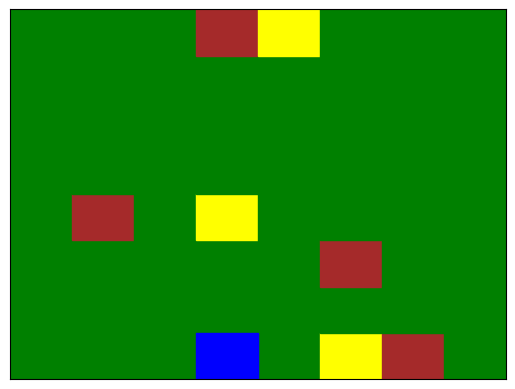

Posição do agente: (3, 0)


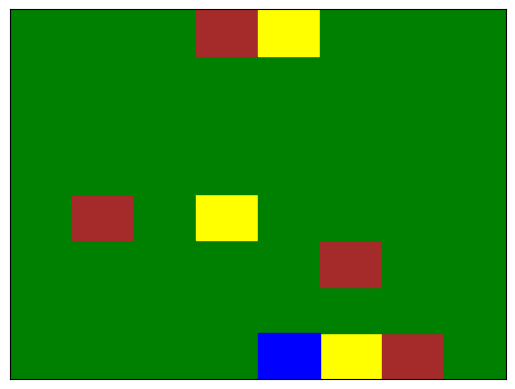

Posição do agente: (4, 0)


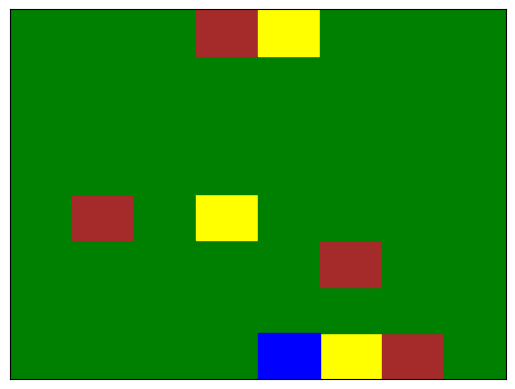

Posição do agente: (4, 0)


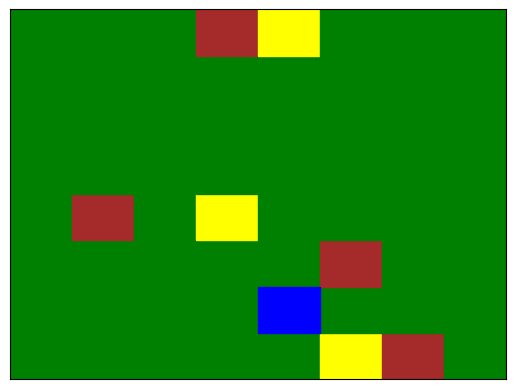

Posição do agente: (4, 1)


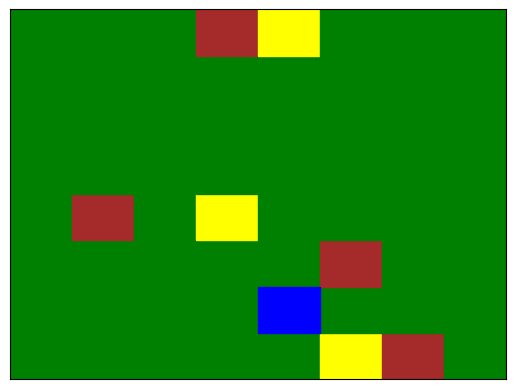

Posição do agente: (4, 1)


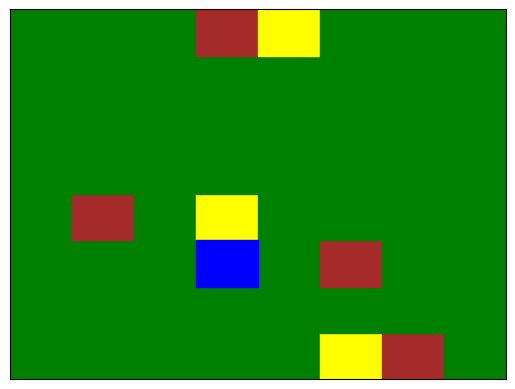

Posição do agente: (3, 2)


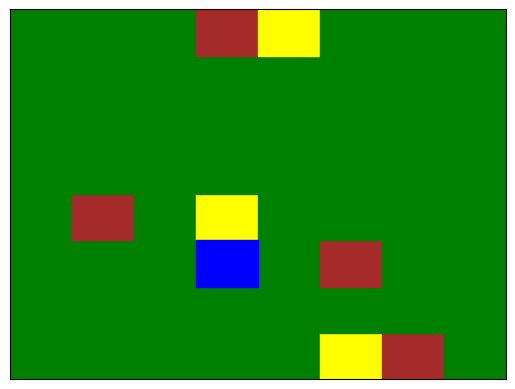

Posição do agente: (3, 2)


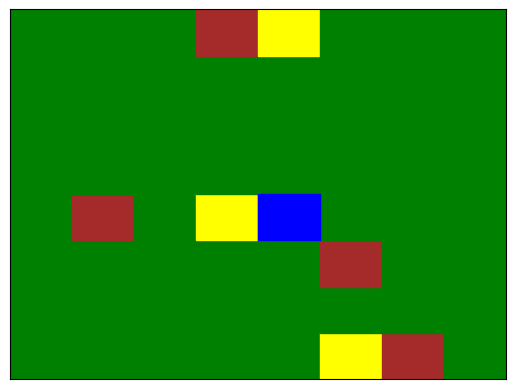

Posição do agente: (4, 3)


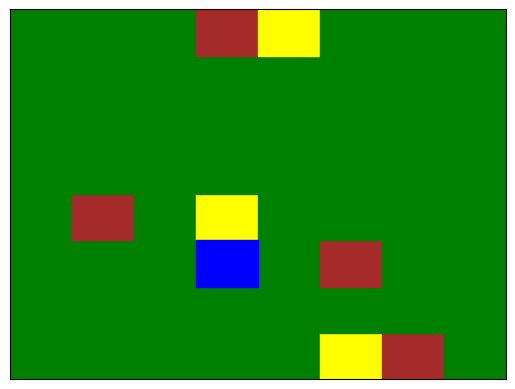

Posição do agente: (3, 2)


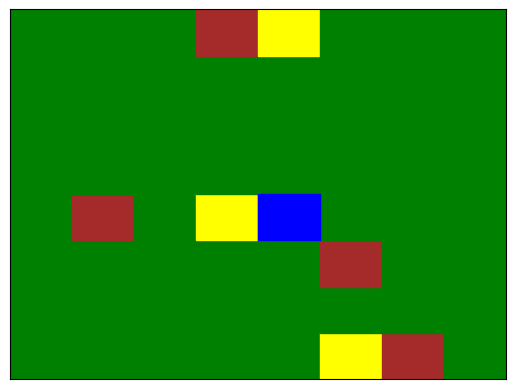

Posição do agente: (4, 3)


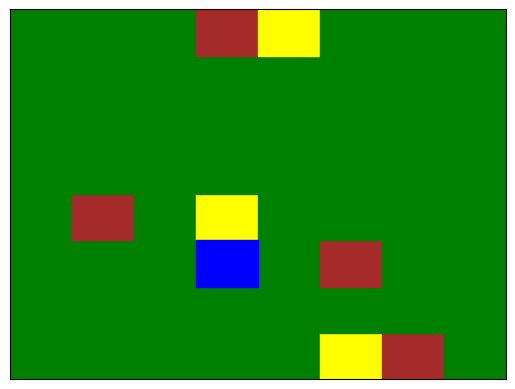

Posição do agente: (3, 2)


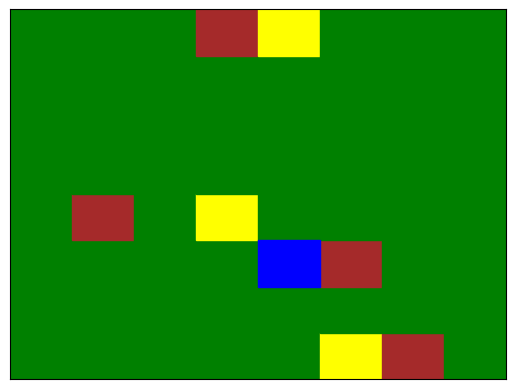

Posição do agente: (4, 2)


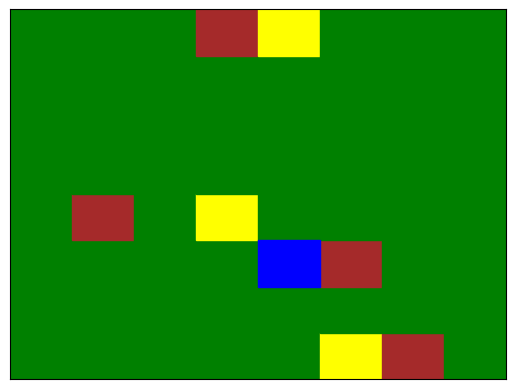

Posição do agente: (4, 2)


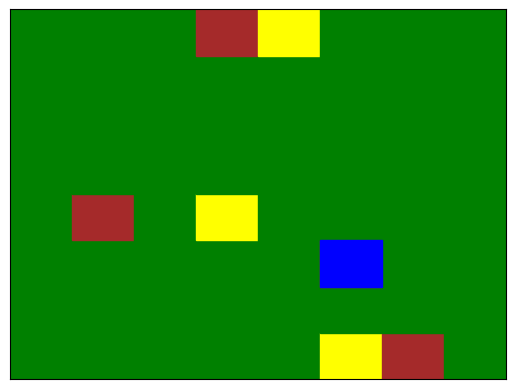

Posição do agente: (5, 2)


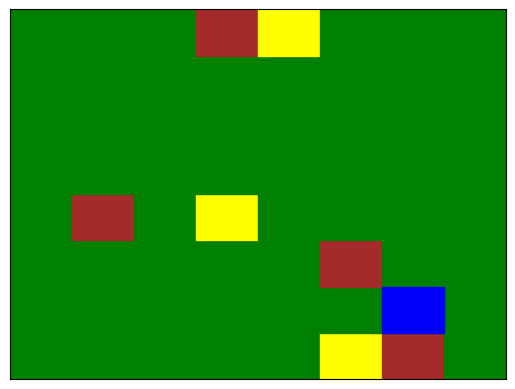

Posição do agente: (6, 1)


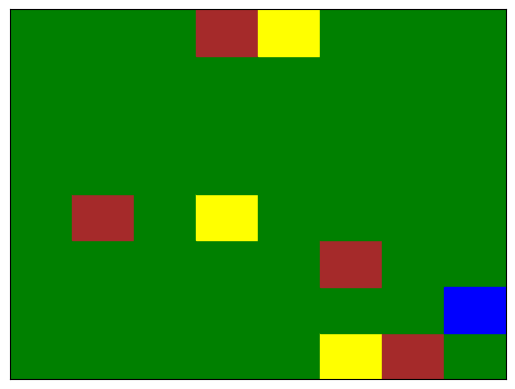

Posição do agente: (7, 1)


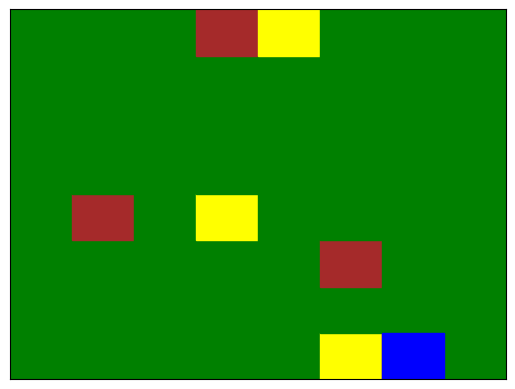

Posição do agente: (6, 0)


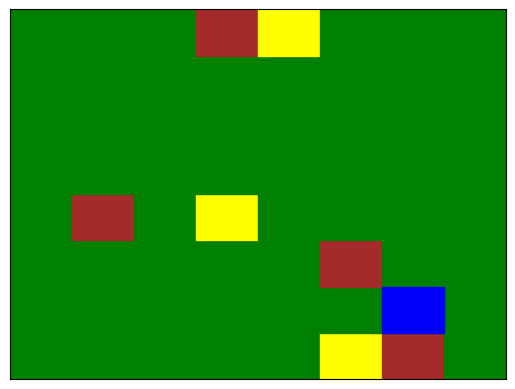

Posição do agente: (6, 1)


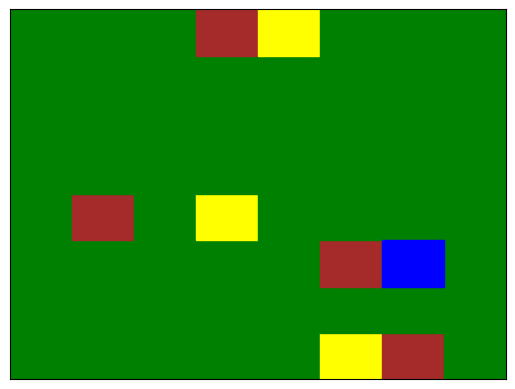

Posição do agente: (6, 2)


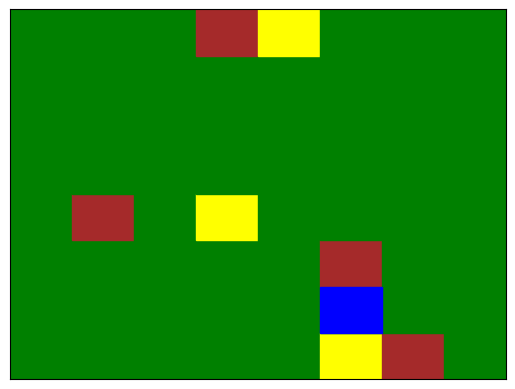

Posição do agente: (5, 1)


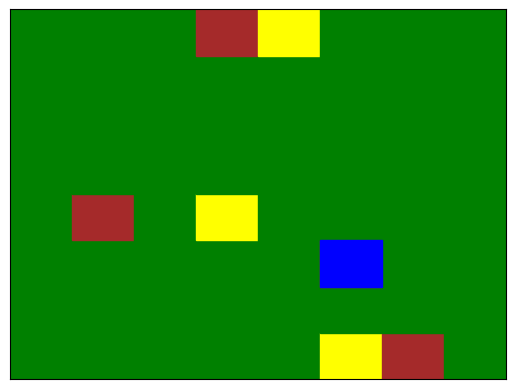

Posição do agente: (5, 2)


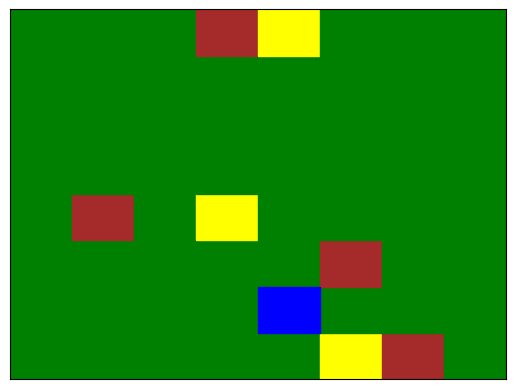

Posição do agente: (4, 1)


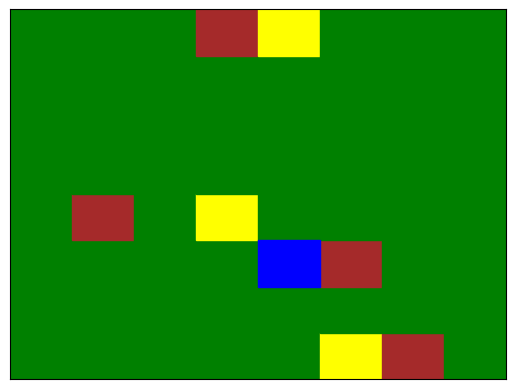

Posição do agente: (4, 2)


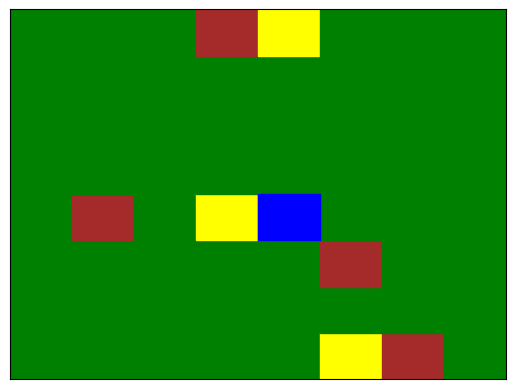

Posição do agente: (4, 3)


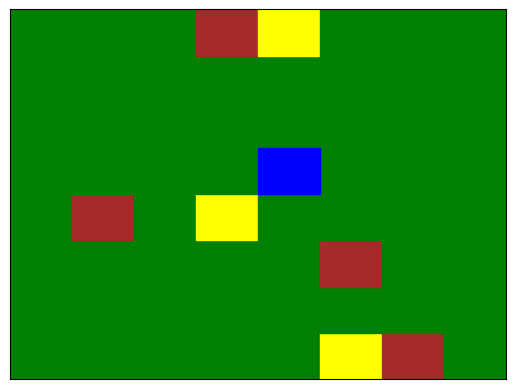

Posição do agente: (4, 4)


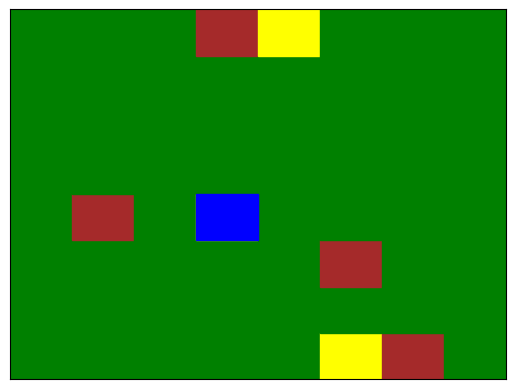

Posição do agente: (3, 3)


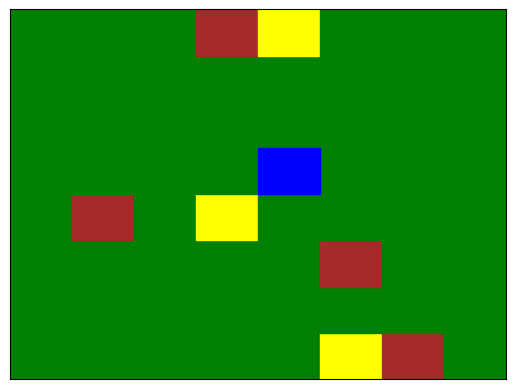

Posição do agente: (4, 4)


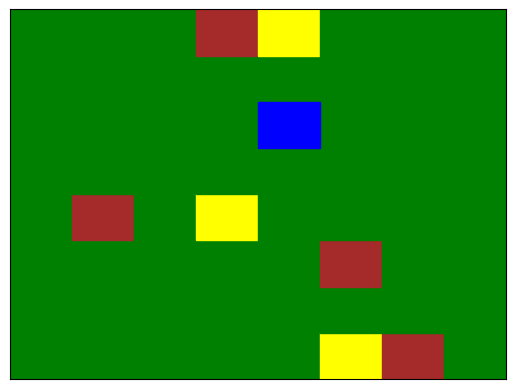

Posição do agente: (4, 5)


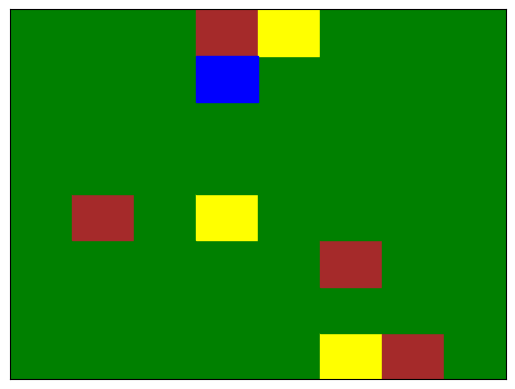

Posição do agente: (3, 6)


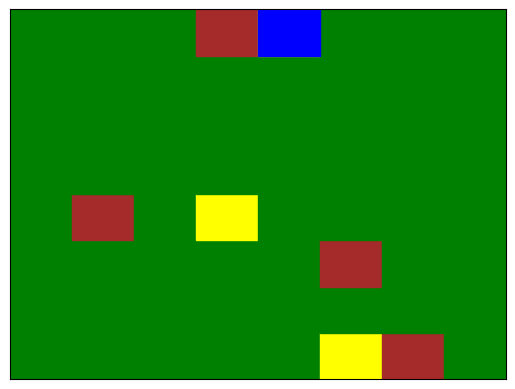

Posição do agente: (4, 7)


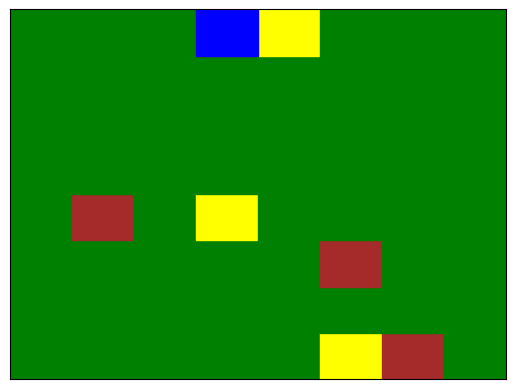

Posição do agente: (3, 7)


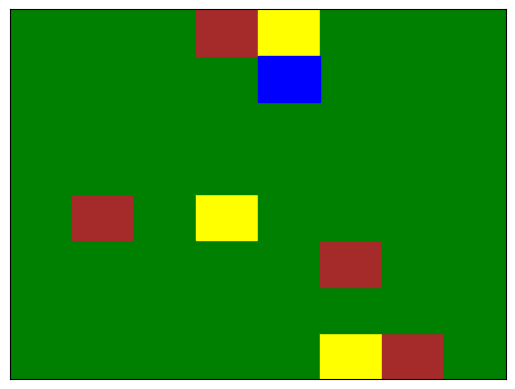

Posição do agente: (4, 6)


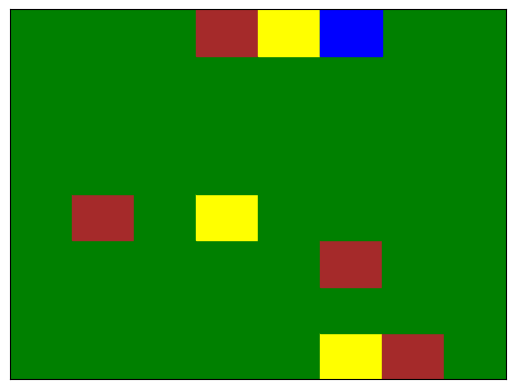

Posição do agente: (5, 7)


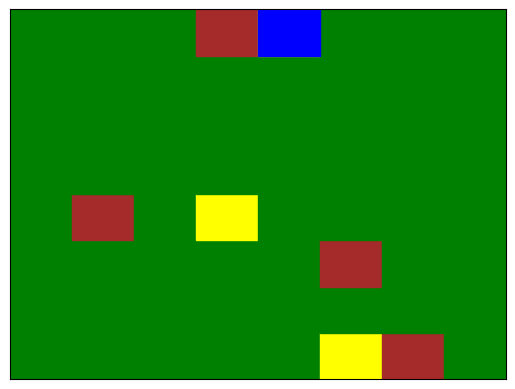

Posição do agente: (4, 7)


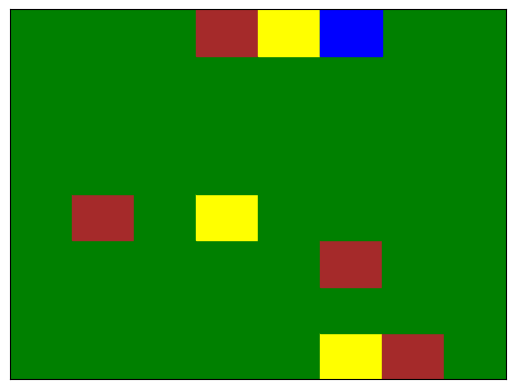

Posição do agente: (5, 7)


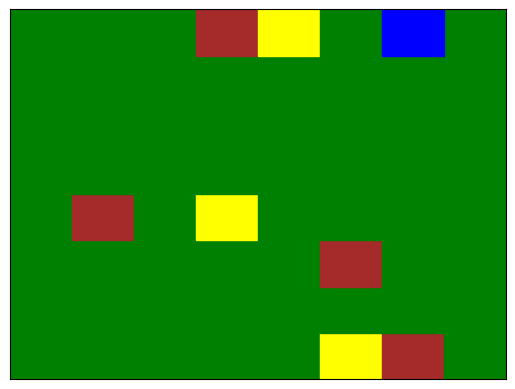

Posição do agente: (6, 7)


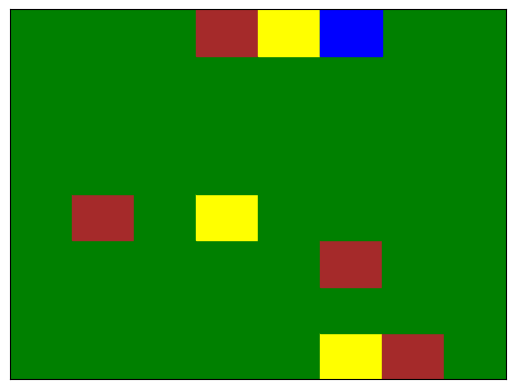

Posição do agente: (5, 7)


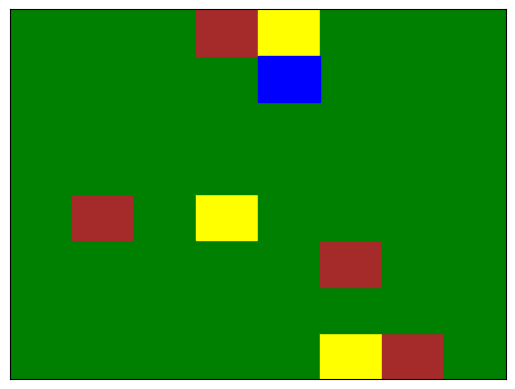

Posição do agente: (4, 6)


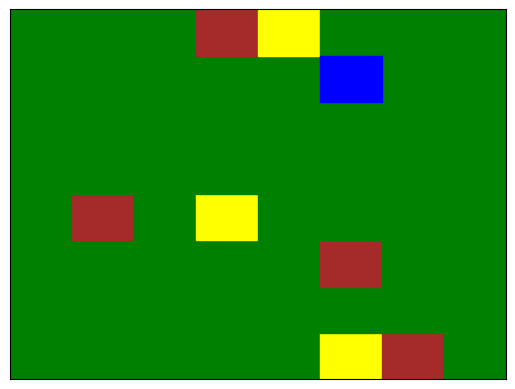

Posição do agente: (5, 6)


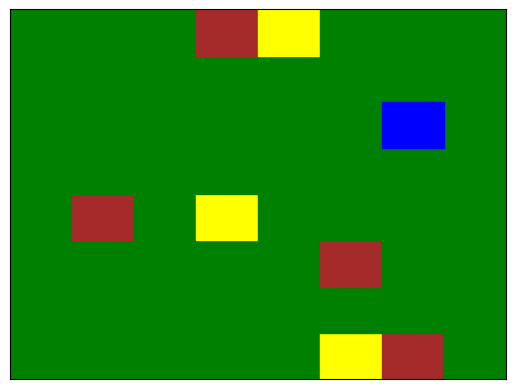

Posição do agente: (6, 5)


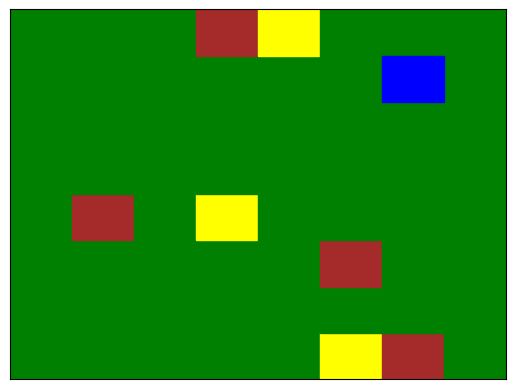

Posição do agente: (6, 6)


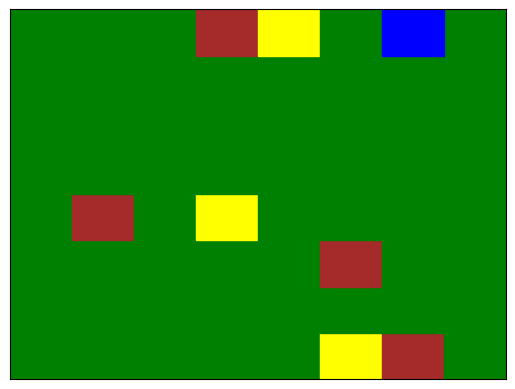

Posição do agente: (6, 7)


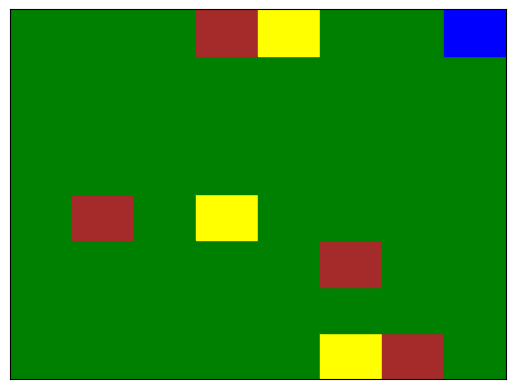

CHEGOU


In [22]:
import matplotlib.pyplot as plt
import numpy as np

tamanho = 8


terreno = np.zeros((tamanho, tamanho))

inicio = [0, 0]
fim = [7, 7]


np.random.seed(0)

areia_movedica_points = []
while len(areia_movedica_points) < 3:
    novo_ponto = list(np.random.randint(0, tamanho, size=(2)))
    if novo_ponto not in areia_movedica_points and novo_ponto != inicio and novo_ponto != fim:
        areia_movedica_points.append(novo_ponto)
        terreno[novo_ponto[0], novo_ponto[1]] = 1

montanha_points = []
while len(montanha_points) < 4:
    novo_ponto = list(np.random.randint(0, tamanho, size=(2)))
    if novo_ponto not in montanha_points and novo_ponto != inicio and novo_ponto != fim \
            and novo_ponto not in areia_movedica_points:
        montanha_points.append(novo_ponto)
        terreno[novo_ponto[0], novo_ponto[1]] = 2


def visualizar_grid(posicao_agente=None):
    fig, ax = plt.subplots()
    for i in range(tamanho):
        for j in range(tamanho):
            if [i, j] == inicio:
                color = 'black'
            elif [i, j] == fim:
                color = 'black'
            elif [i, j] in areia_movedica_points:
                color = 'yellow'
            elif [i, j] in montanha_points:
                color = 'brown'
            else:
                color = 'green'
            ax.add_patch(plt.Rectangle((i, j), 1, 1, color=color))
    if posicao_agente:
        ax.add_patch(plt.Rectangle((posicao_agente[0], posicao_agente[1]), 1, 1, color='blue'))
    ax.set_xlim(0, tamanho)
    ax.set_ylim(0, tamanho)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.grid(False)
    plt.show()


def acoes_disponiveis(posicao):
    movimentos = []
    x, y = posicao

    if x > 0:
      # Ir para cima
        movimentos.append((x - 1, y))
    if x < tamanho - 1:
      # Ir para baixo
        movimentos.append((x + 1, y))
    if y > 0:
      # Ir para esquerda
        movimentos.append((x, y - 1))
    if y < tamanho - 1:
      # Ir para direita
        movimentos.append((x, y + 1))
    return movimentos


def recompensa(posicao):
    x, y = posicao
    if [x, y] in montanha_points:
        return -10  # Montanha: recompensa negativa
    elif [x, y] in areia_movedica_points:
        return -5  # Areia movediça: recompensa negativa
    elif [x, y] == fim:
        return 10  # Ponto final: recompensa positiva
    else:
        return 0  # Terreno normal: recompensa zero

import random

def agente():
    posicao_atual = inicio
    visualizar_grid(posicao_atual)

    while posicao_atual != fim:

        if posicao_atual in montanha_points:
            print("O agente achou uma montanha")
            visualizar_grid(posicao_atual)  # Adicionado para atualizar a visualização quando uma montanha é encontrada
            return

        if posicao_atual in areia_movedica_points:
            print("O agente caiu na areia movediça")
            visualizar_grid(posicao_atual)  # Adicionado para atualizar a visualização quando a areia movediça é encontrada
            return

        incremento_x = random.choice([-1, 0, 1])
        incremento_y = random.choice([-1, 0, 1])

        proxima_posicao_x = posicao_atual[0] + incremento_x
        proxima_posicao_y = posicao_atual[1] + incremento_y

        proxima_posicao_x = max(0, min(proxima_posicao_x, tamanho - 1))
        proxima_posicao_y = max(0, min(proxima_posicao_y, tamanho - 1))

        nova_posicao = (proxima_posicao_x, proxima_posicao_y)

        if nova_posicao in areia_movedica_points:
            print("O agente caiu na areia movediça")
            visualizar_grid(nova_posicao)
            return

        print("Posição do agente:", posicao_atual)
        visualizar_grid(nova_posicao)
        posicao_atual = nova_posicao

    print("CHEGOU")



# Exemplo de uso
inicio = (0, 0)
fim = (7, 7)

# Execução do agente
agente()
